# Contents

1. Micro_credit_loan
2. Problem Definition
3. Data Analysis (EDA)
4. Pre-processing Pipeline
5. Building Machine Learning Models
6. Conclusion

# 1. Micro_credit_loan

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

# 2. Problem Definition

We need to build a model to classify label '0' as defaulter and '1' as non-defaulter

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('micro_credit_project.csv',parse_dates=['pdate'])

In [4]:
df.dtypes

Unnamed: 0                       int64
label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30              

In [5]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

# 3.Data Analysis (EDA)

In [6]:
df.pcircle.value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [7]:
df.shape

(209593, 37)

In [8]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

* No null values are present

# Observation:

* Columns 'Unnamed: 0', 'msisdn',and 'pcirlce' are not giving any useful information, hence dropping these columns.

In [9]:
df.drop(['Unnamed: 0','msisdn','pcircle'],axis=1,inplace=True)

In [10]:
df.shape

(209593, 34)

# Univariate Analysis

* Lets first analyse our target variable

In [11]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

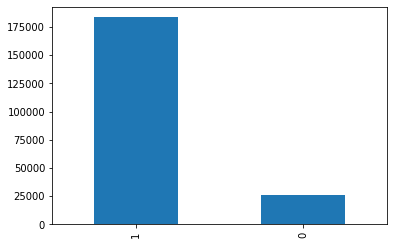

In [12]:
df['label'].value_counts().plot.bar()

In [13]:
df['label'].value_counts()/len(df['label'])

1    0.875177
0    0.124823
Name: label, dtype: float64

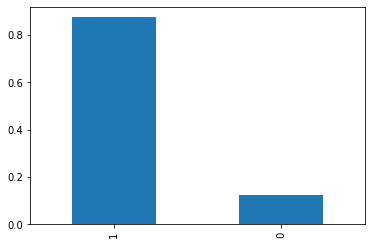

In [14]:
(df['label'].value_counts()/len(df['label'])).plot.bar()

### Observation

* The dataset is highly unbalanced.

In [15]:
df[df.columns[0:11]].describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,3737.355121
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,53643.625172
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,2.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,6.000000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,203.000000,999606.368100


In [16]:
df[df.columns[12:22]].describe()

,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90
count,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495
std,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556
min,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000
25%,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000
50%,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000
75%,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000
max,55000.000000,999479.419300,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240100,38.000000


In [17]:
df[df.columns[22:33]].describe()

,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,64.000000,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


### Observation

* From the above table, it is been observed that except column 'label', all columns have large standard deviation and huge gap between 3rd quartile and max value.
* This indicates the presence of outliers and flat distribution.

In [18]:
df_nodate=df.iloc[:,0:-1]
collist=df_nodate.columns.values
ncol=2
nrows=17

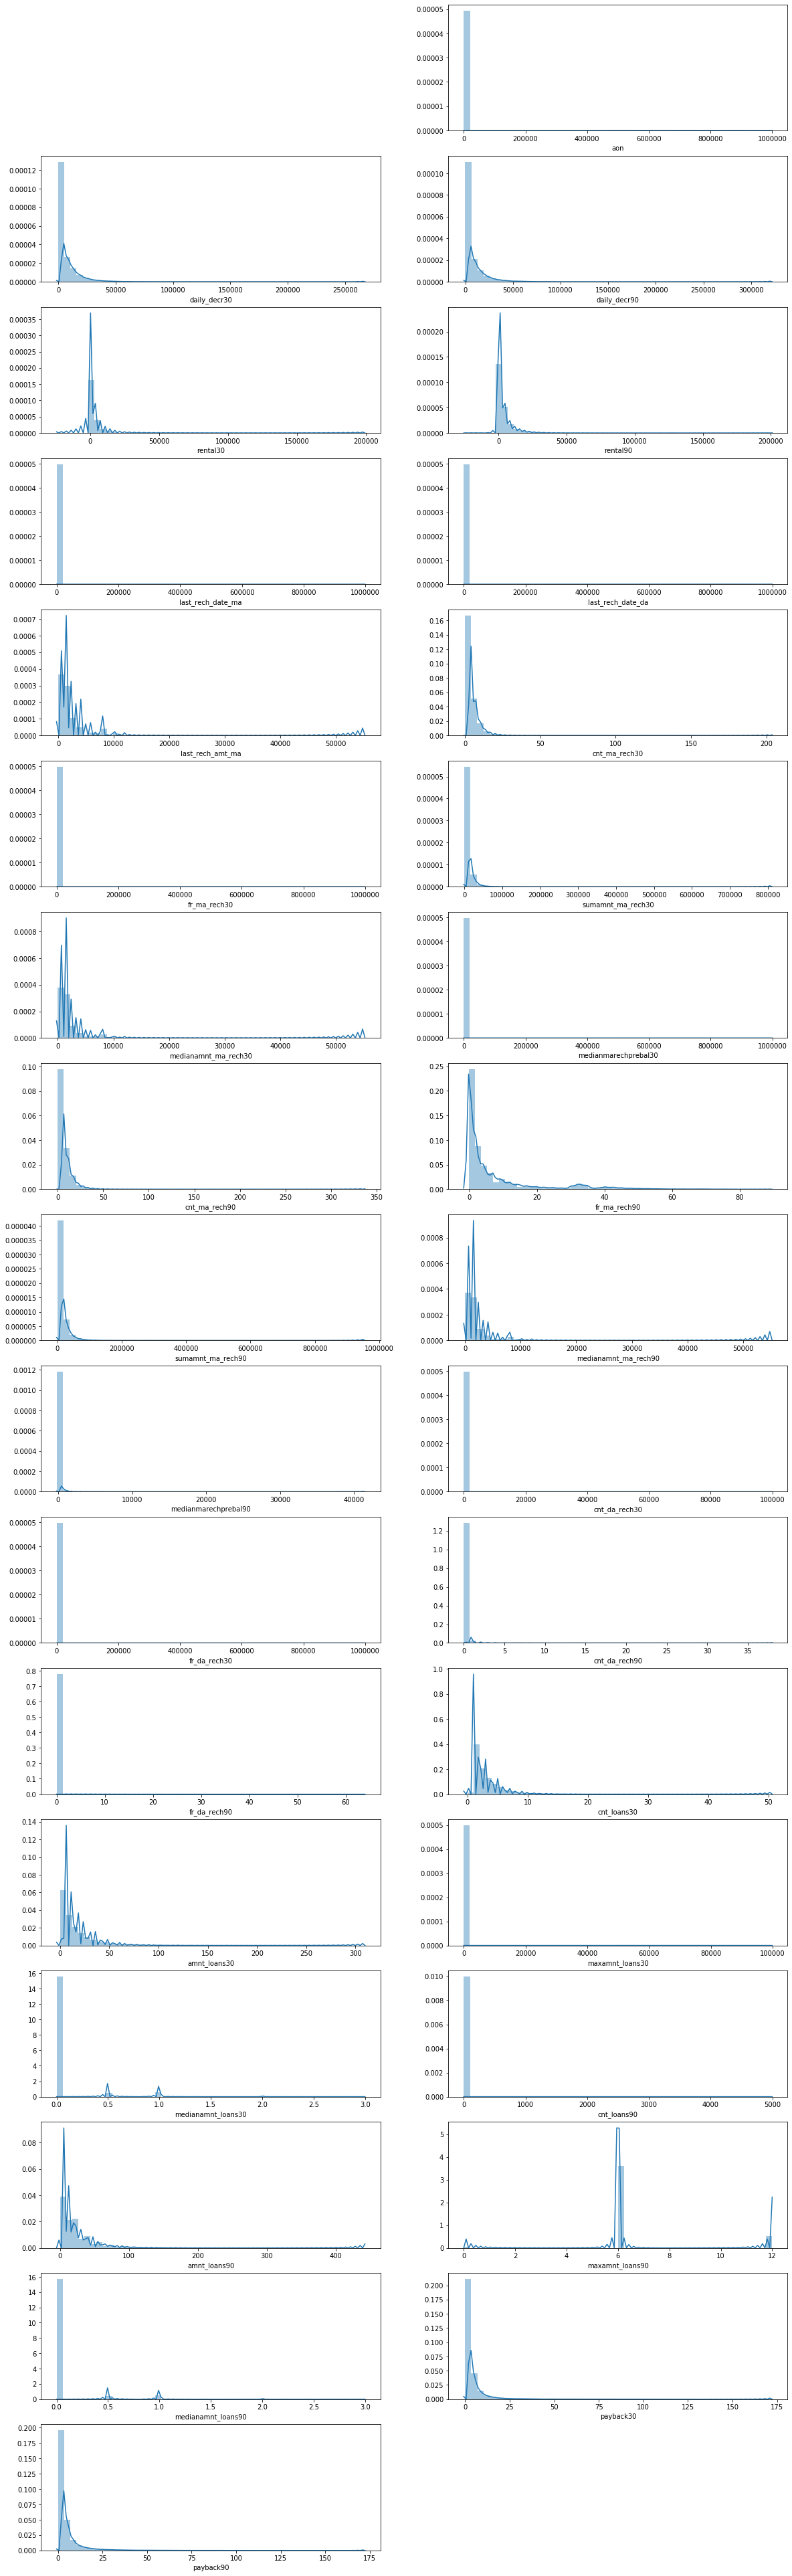

In [19]:
plt.figure(figsize=(20,70))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_nodate[collist[i]])

### Observation
* All columns are right skewed.
* Columns "rental30','rental90', 'last_rech_amt_ma', 'medianamnt_ma_rech30', 'fr_ma_rech90', 'medianamnt-ma-rech90', 'cnt_loans30','amnt_loans30','amnt_loans90' has negative values.

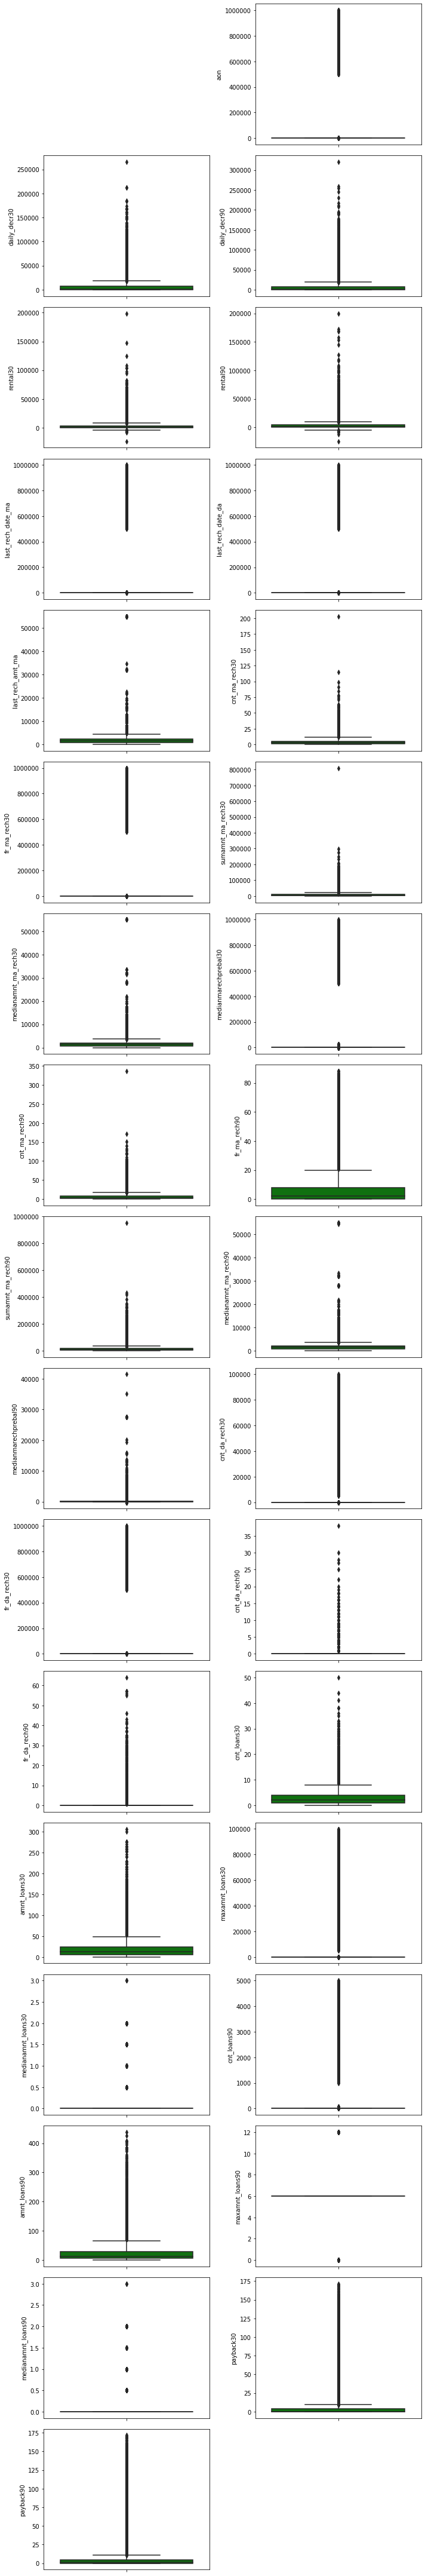

In [20]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(10,60))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_nodate[collist[i]],color='green',orient='v')
    plt.tight_layout()

### Observation
* Outliers are present in every column


# Bivariate Analysis
* Checking the relationship between independent variable and between independent and dependent variable.

In [21]:
#Lets check the correlation.
dfcor= df.corr()
dfcor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


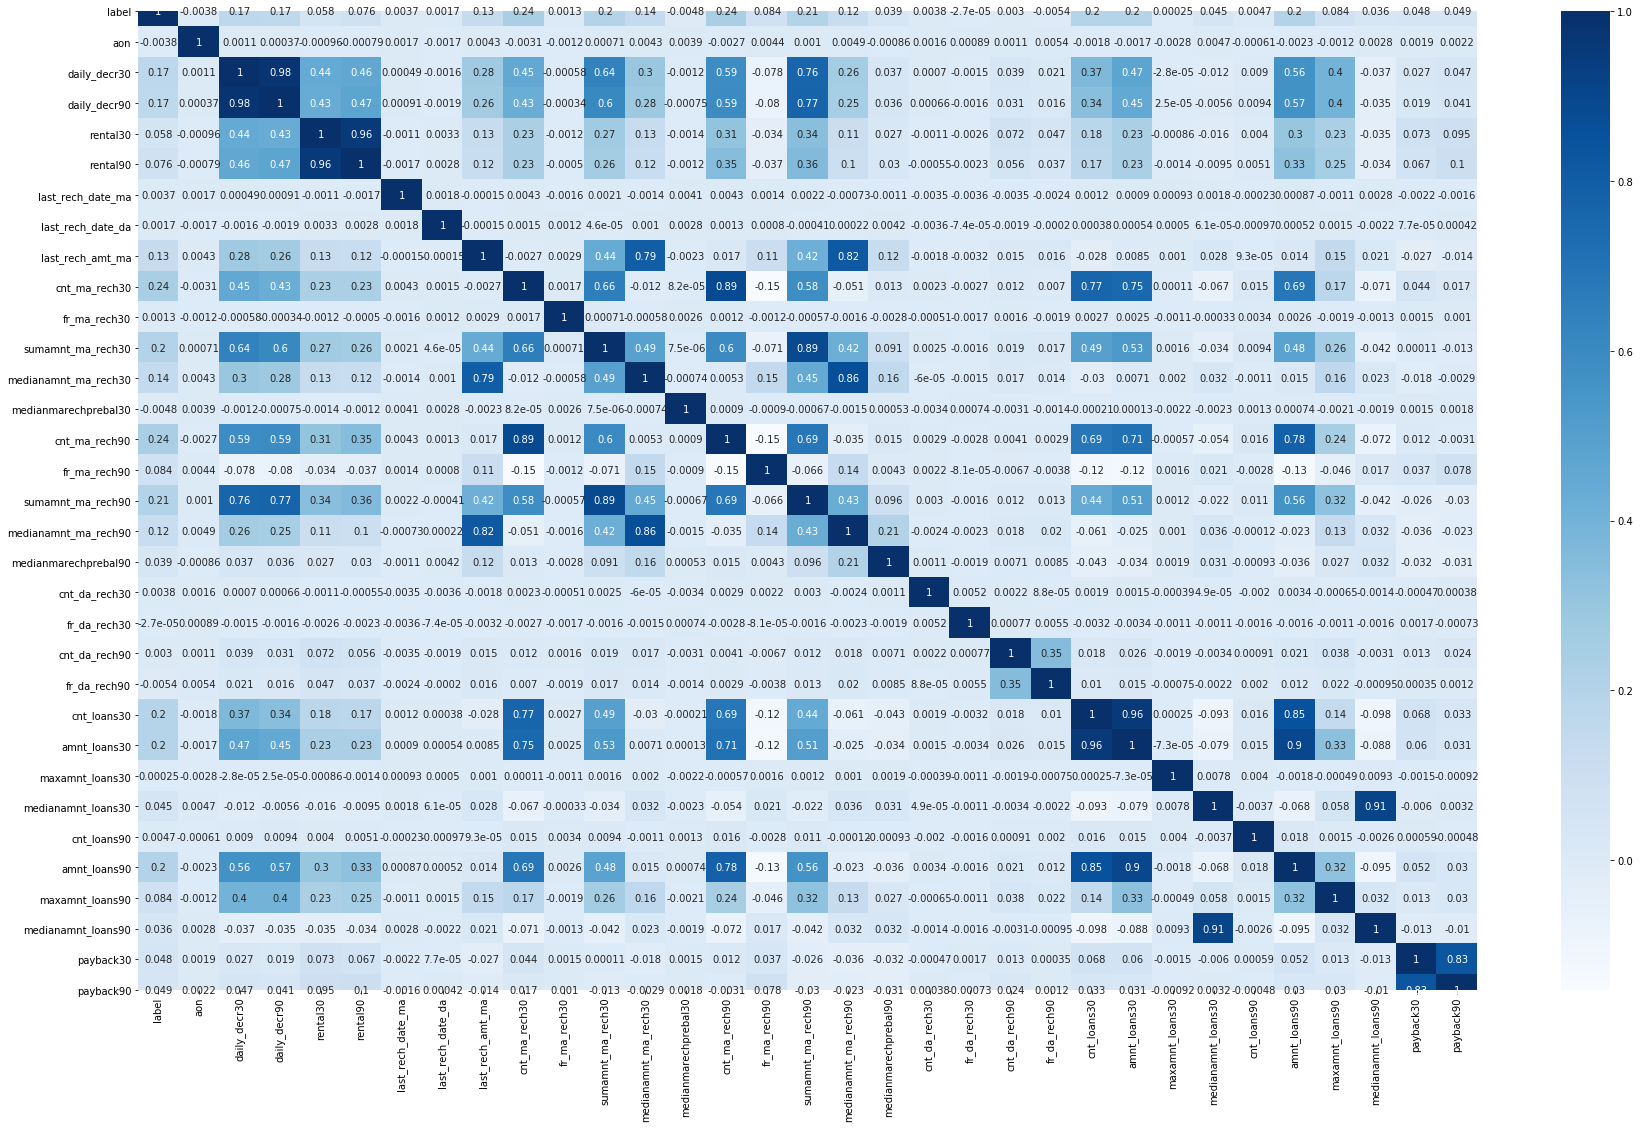

In [22]:
plt.figure(figsize = (30,18))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

### Observation
Following independent variables are highly correlated with dependent variable:
    * daily_decr30
    * daily_decr90
    * rental30
    * rental90
    * last_rech_amt_ma
    * cnt_ma_rech30
    * sumamnt_ma_rech30
    * medianamnt_ma_rech30
    * cnt_ma_rech90
    * sumamnt_ma_rech90
    * medianamnt_ma_rech90
    * cnt_loans30
    * amnt_loans30
    * amnt_loans90
    
    

In [23]:
# Analysing the above separately

In [24]:
label0=['0']

In [25]:
df_0=df[df.label.isin(label0)]

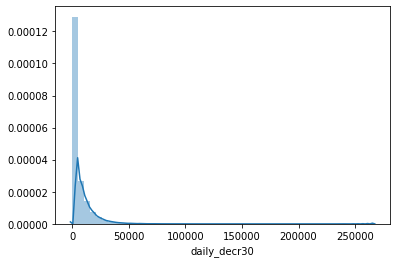

In [26]:
sns.distplot(df['daily_decr30'])

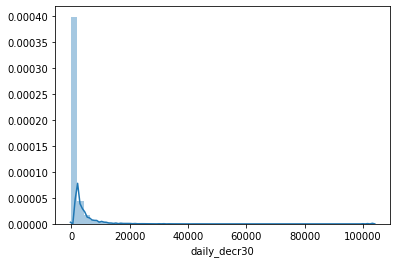

In [27]:
sns.distplot(df_0['daily_decr30'])

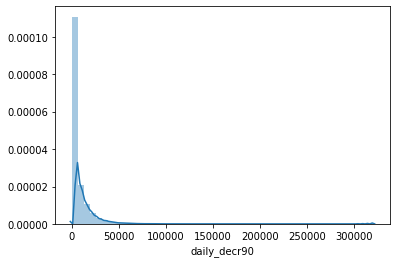

In [28]:
sns.distplot(df['daily_decr90'])

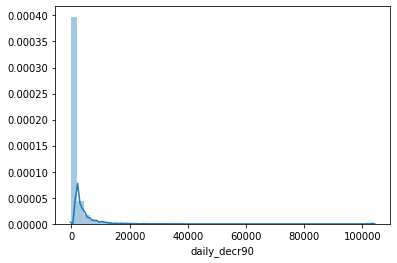

In [29]:
sns.distplot(df_0['daily_decr90'])

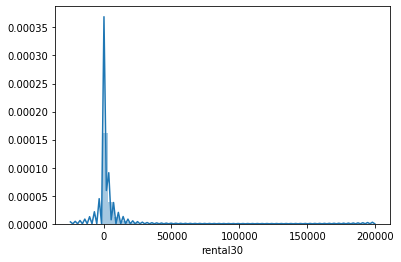

In [30]:
sns.distplot(df['rental30'])

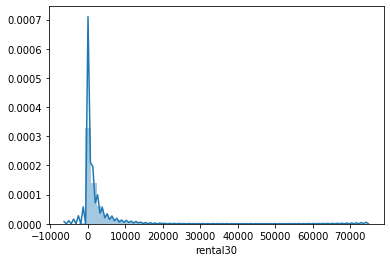

In [31]:
sns.distplot(df_0['rental30'])

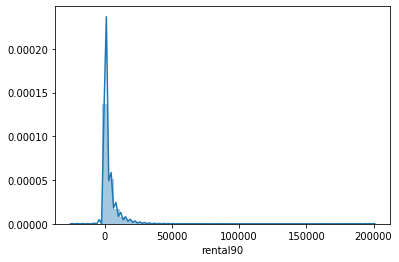

In [32]:
sns.distplot(df['rental90'])

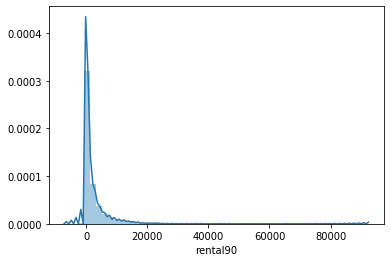

In [33]:
sns.distplot(df_0['rental90'])

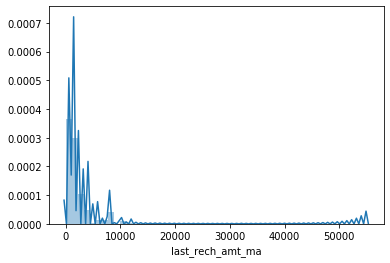

In [34]:
sns.distplot(df['last_rech_amt_ma'])

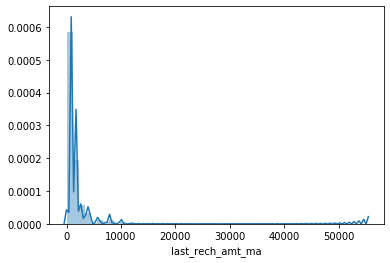

In [35]:
sns.distplot(df_0['last_rech_amt_ma'])

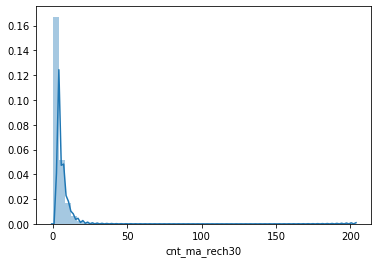

In [36]:
sns.distplot(df['cnt_ma_rech30'])

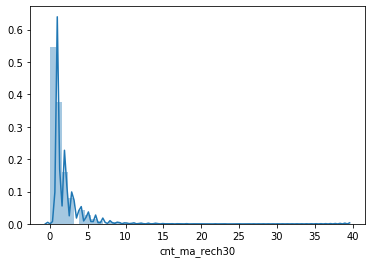

In [37]:
sns.distplot(df_0['cnt_ma_rech30'])

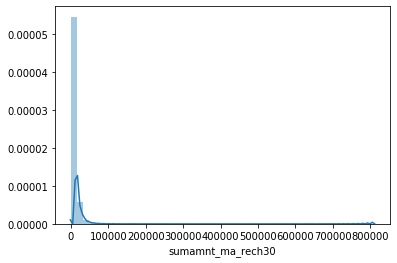

In [38]:
sns.distplot(df['sumamnt_ma_rech30'])

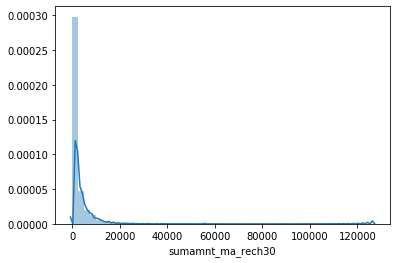

In [39]:
sns.distplot(df_0['sumamnt_ma_rech30'])

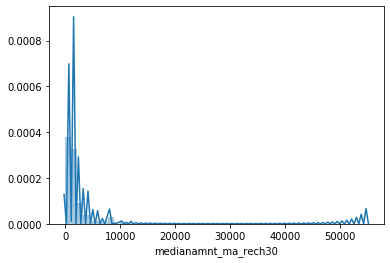

In [40]:
sns.distplot(df['medianamnt_ma_rech30'])

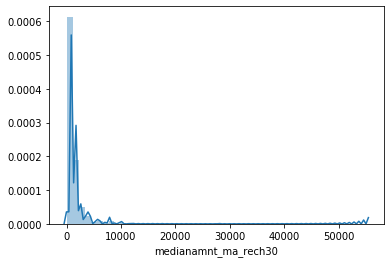

In [41]:
sns.distplot(df_0['medianamnt_ma_rech30'])

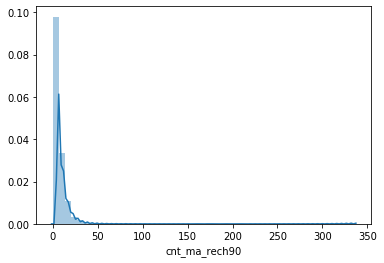

In [42]:
sns.distplot(df['cnt_ma_rech90'])


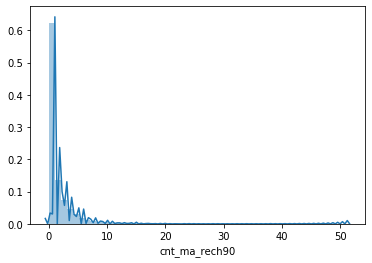

In [43]:
sns.distplot(df_0['cnt_ma_rech90'])

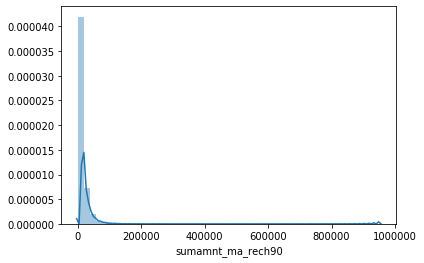

In [44]:
sns.distplot(df['sumamnt_ma_rech90'])

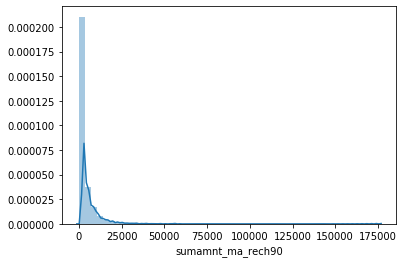

In [45]:
sns.distplot(df_0['sumamnt_ma_rech90'])

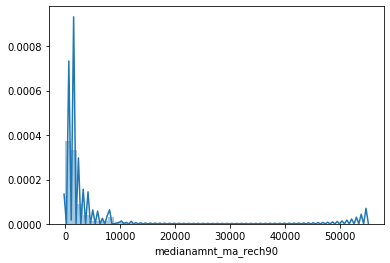

In [46]:
sns.distplot(df['medianamnt_ma_rech90'])

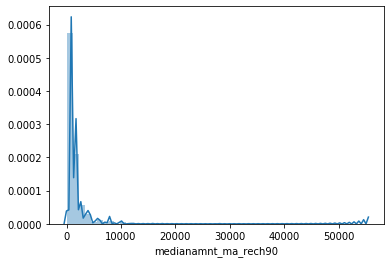

In [47]:
sns.distplot(df_0['medianamnt_ma_rech90'])

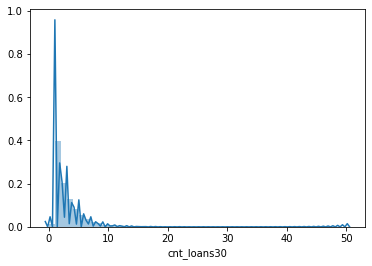

In [48]:
sns.distplot(df['cnt_loans30'])

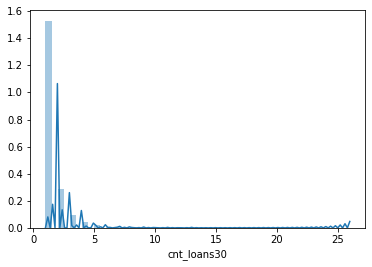

In [49]:
sns.distplot(df_0['cnt_loans30'])

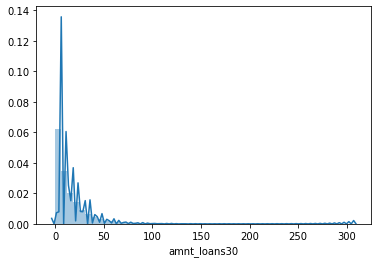

In [50]:
sns.distplot(df['amnt_loans30'])

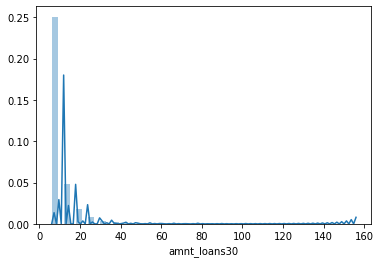

In [51]:
sns.distplot(df_0['amnt_loans30'])

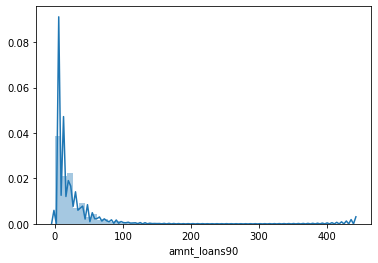

In [52]:
sns.distplot(df['amnt_loans90'])

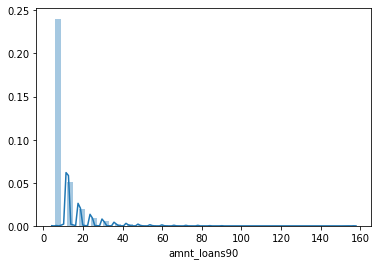

In [53]:
sns.distplot(df_0['amnt_loans90'])

In [54]:
list1= ['daily_decr30','daily_decr90','rental30','rental90','last_rech_amt_ma','cnt_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','cnt_ma_rech90','sumamnt_ma_rech90','medianamnt_ma_rech90','cnt_loans30','amnt_loans30','amnt_loans90']
list3=['0-10,000','0-15,000','0-10,000','0-15','0-12,000','0-10','0-25,000','0-8,000','0-10','0-25,000','0-10,000','0-5','0-25','0-30']
list2 =['0-35,000','0-40,000','0-25,000','0-25,000','0-10,000','0-25','0-80,000','0-9,000','0-50','0-100,000','0-10,00','0-10','0-50','0-100']

In [55]:
comparison=pd.DataFrame(list(zip(list1,list3,list2)),columns=['Variables','density_distri(label_0)','density_distri(label_1)'])

In [56]:
comparison

,Variables,density_distri(label_0),density_distri(label_1)
0,daily_decr30,"0-10,000","0-35,000"
1,daily_decr90,"0-15,000","0-40,000"
2,rental30,"0-10,000","0-25,000"
3,rental90,0-15,"0-25,000"
4,last_rech_amt_ma,"0-12,000","0-10,000"
5,cnt_ma_rech30,0-10,0-25
6,sumamnt_ma_rech30,"0-25,000","0-80,000"
7,medianamnt_ma_rech30,"0-8,000","0-9,000"
8,cnt_ma_rech90,0-10,0-50
9,sumamnt_ma_rech90,"0-25,000","0-100,000"


# Observation
* It is been observed that the values of ranges are greater in label-1 than label-0.
* Hence we can assume that customer with lower values of the aboves variables may be a default customer.

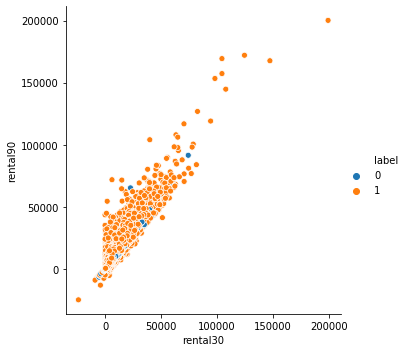

In [57]:
sns.relplot(x="rental30", y="rental90", hue="label", data=df);

In [ ]:
sns.relplot(x="last_rech_amt_ma", y="medianamnt_ma_rech30", hue="label", data=df);

In [ ]:
sns.relplot(x="cnt_ma_rech30",y="sumamnt_ma_rech30",hue="label",data=df)

In [ ]:
sns.relplot(x="sumamnt_ma_rech30",y="amnt_loans30",hue="label",data=df)

In [ ]:
sns.relplot(x="cnt_ma_rech90",y="amnt_loans90",hue="label",data=df)

In [ ]:
sns.relplot(x="sumamnt_ma_rech90",y="cnt_ma_rech30",hue="label",data=df)

In [ ]:
sns.relplot(x="medianamnt_ma_rech90",y="last_rech_amt_ma",hue="label",data=df)

In [ ]:
sns.relplot(x="cnt_loans30",y="amnt_loans90",hue="label",data=df)

In [ ]:
sns.pairplot(df,hue="label",vars=['daily_decr90','daily_decr90','rental30','rental90','last_rech_amt_ma','cnt_ma_rech30','fr_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','cnt_ma_rech90','sumamnt_ma_rech90','medianamnt_ma_rech90','cnt_loans30','amnt_loans30'])

# Treating Outliers

#### Lets analyse our column 'aon' with 'pdate'
####  As on 29th march 2007, first telecommunication network started in Indonesia.
#### There will count the total no. of days from the start date to every date in column 'pdate' and compare it with column "aon."

In [58]:
df_date=df.assign(start_date='20070329')

In [59]:
df_date['start_date'] = pd.to_datetime(df_date['start_date'], format='%Y%m%d')

In [60]:
df_date.dtypes

label                            int64
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30                      int64
amnt_loans30                     int64
maxamnt_loans30          

In [61]:
df_date['Difference'] = df_date['pdate'].sub(df_date['start_date'], axis=0)

In [62]:
df_date['Difference'] = df_date['Difference'] / np.timedelta64(1, 'D')

In [63]:
df_sort=df_date.loc[(df_date['aon']>df_date['Difference'])] 

In [64]:
df_sort.aon.min()

500101.67799999996

In [65]:
df.aon[df.aon>500101]=np.nan

In [66]:
df.isnull().sum()

label                      0
aon                     2089
daily_decr30               0
daily_decr90               0
rental30                   0
rental90                   0
last_rech_date_ma          0
last_rech_date_da          0
last_rech_amt_ma           0
cnt_ma_rech30              0
fr_ma_rech30               0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
medianmarechprebal30       0
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
medianmarechprebal90       0
cnt_da_rech30              0
fr_da_rech30               0
cnt_da_rech90              0
fr_da_rech90               0
cnt_loans30                0
amnt_loans30               0
maxamnt_loans30            0
medianamnt_loans30         0
cnt_loans90                0
amnt_loans90               0
maxamnt_loans90            0
medianamnt_loans90         0
payback30                  0
payback90                  0
pdate                      0
dtype: int64

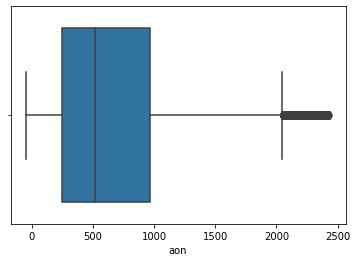

In [67]:
sns.boxplot(df.aon)

In [68]:
df.aon[df.aon>2000]=2000

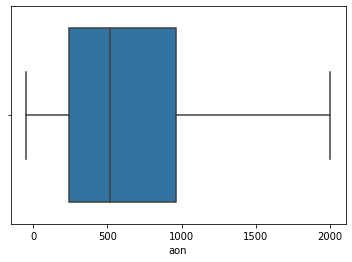

In [69]:
sns.boxplot(df.aon)

In [70]:
df.daily_decr30[df.daily_decr30>10000]=10000

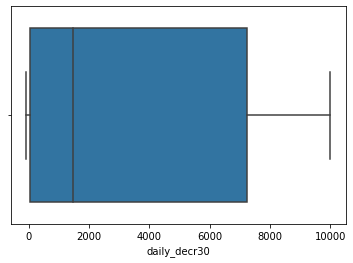

In [71]:
sns.boxplot(df.daily_decr30)

In [72]:
df.daily_decr90[df.daily_decr90>6000]=6000

In [73]:
df.rental30[df.rental30>5000]=5000
df.rental30[df.rental30<0]=0

In [74]:
df.rental90[df.rental90>5000]=5000
df.rental90[df.rental90<0]=0

In [75]:
df.last_rech_date_ma[df.last_rech_date_ma>10]=10
df.last_rech_date_ma[df.last_rech_date_ma<0]=0

In [76]:
df.last_rech_date_da[df.last_rech_date_da>0]=0
df.last_rech_date_da[df.last_rech_date_da<0]=0

In [77]:
df.last_rech_amt_ma[df.last_rech_amt_ma>3000]=3000

In [78]:
df.cnt_ma_rech30[df.cnt_ma_rech30>10]=10

In [79]:
df.cnt_ma_rech90[df.cnt_ma_rech90>15]=15

In [80]:
df.fr_ma_rech30[df.fr_ma_rech30>10]=10
df.fr_ma_rech30[df.fr_ma_rech30<0]=0

In [81]:
df.sumamnt_ma_rech30[df.sumamnt_ma_rech30>20000]=20000

In [82]:
df.medianamnt_ma_rech30[df.medianamnt_ma_rech30>2000]=2000

In [83]:
df.medianmarechprebal30[df.medianmarechprebal30>175]=175
df.medianmarechprebal30[df.medianmarechprebal30<0]=0

In [84]:
df.medianmarechprebal90[df.medianmarechprebal90>160]=160
df.medianmarechprebal90[df.medianmarechprebal90<0]=0

In [85]:
df.cnt_ma_rech90[df.cnt_ma_rech90>20000]=20000

In [86]:
df.fr_ma_rech90[df.fr_ma_rech90>20]=20

In [87]:
df.sumamnt_ma_rech90[df.sumamnt_ma_rech90>25000]=25000

In [88]:
df.medianamnt_ma_rech90[df.medianamnt_ma_rech90>3000]=3000

In [89]:
df.fr_da_rech30[df.fr_da_rech30>0]=0
df.fr_da_rech30[df.fr_da_rech30<0]=0

In [90]:
df.fr_da_rech90[df.fr_da_rech90>0]=0

In [91]:
df.cnt_da_rech90[df.cnt_da_rech90>0]=0

In [92]:
df.cnt_da_rech30[df.cnt_da_rech30>0]=0

In [93]:
df.cnt_loans30[df.cnt_loans30>8]=8

In [94]:
df.amnt_loans30[df.amnt_loans30>50]=50

In [95]:
df.maxamnt_loans30[df.maxamnt_loans30>7]=7
df.maxamnt_loans30[df.maxamnt_loans30<6]=6

In [96]:
df.medianamnt_loans30[df.medianamnt_loans30>0]=0

In [97]:
df.cnt_loans90[df.cnt_loans90>10]=10
df.cnt_loans90[df.cnt_loans90<0]=0


In [98]:
df.amnt_loans90[df.amnt_loans90>65]=65

In [99]:
df.maxamnt_loans90[df.maxamnt_loans90>6]=6
df.maxamnt_loans90[df.maxamnt_loans90<6]=6

In [100]:
df.medianamnt_loans90[df.medianamnt_loans90>0]=0

In [101]:
df.payback30[df.payback30>9]=9

In [102]:
df.payback90[df.payback90>10]=10

In [103]:
# Again checking outliers through boxplots

In [104]:
#No use of date column so lets drop it
df.drop(['pdate'],axis=1,inplace=True)

In [105]:
collist=df.columns.values
ncol=2
nrows=17

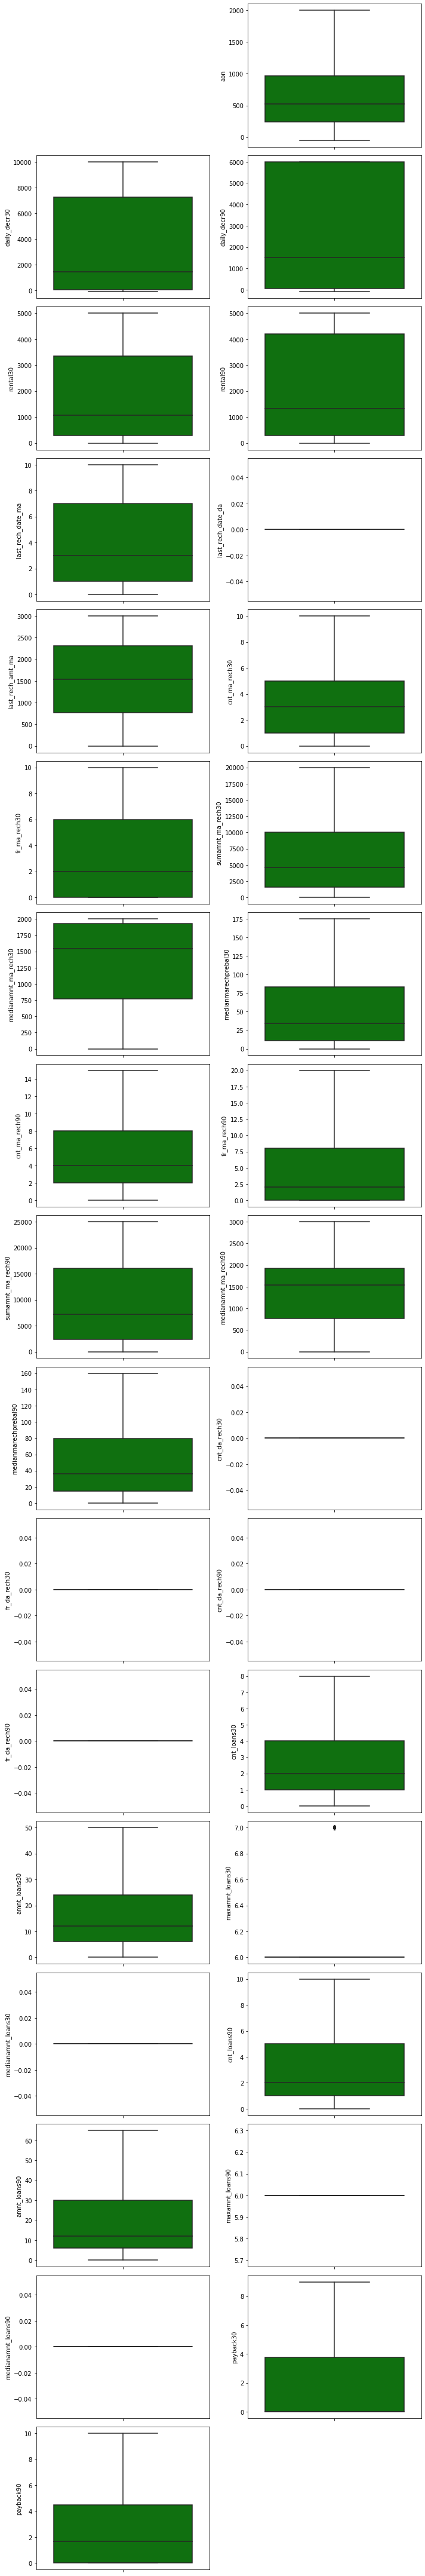

In [106]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(10,60))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [107]:
df.isnull().sum()

label                      0
aon                     2089
daily_decr30               0
daily_decr90               0
rental30                   0
rental90                   0
last_rech_date_ma          0
last_rech_date_da          0
last_rech_amt_ma           0
cnt_ma_rech30              0
fr_ma_rech30               0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
medianmarechprebal30       0
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
medianmarechprebal90       0
cnt_da_rech30              0
fr_da_rech30               0
cnt_da_rech90              0
fr_da_rech90               0
cnt_loans30                0
amnt_loans30               0
maxamnt_loans30            0
medianamnt_loans30         0
cnt_loans90                0
amnt_loans90               0
maxamnt_loans90            0
medianamnt_loans90         0
payback30                  0
payback90                  0
dtype: int64

In [108]:
df["aon"].fillna(df["aon"].mean(),inplace=True)

In [109]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

# 4. Pre-processing

In [110]:
x=df.iloc[:,1:]

In [111]:
y=df[['label']]

In [112]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x = scale.fit_transform(x)

In [113]:
from sklearn.decomposition import PCA

In [114]:
pca =PCA(n_components=25)

In [115]:
x_pca = pca.fit_transform(x)


In [116]:
pd.DataFrame(data=x_pca)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.946128,0.260594,4.175625,-1.830854,-0.146999,-1.246261,-0.359039,0.497995,0.436629,-0.590698,...,-0.102637,-0.095069,-0.020704,-0.034759,-0.022966,0.077630,-0.044466,-0.009466,0.004542,-3.423714e-16
1,0.446918,3.226688,-0.505603,3.134403,-0.934983,0.388366,1.077340,1.797895,0.752917,0.842436,...,-0.146283,-0.200826,0.184485,-0.354508,-0.214268,-0.153533,-0.041929,0.129957,-0.068784,3.185305e-16
2,-2.647532,0.681451,-0.987002,0.222869,-0.051223,-0.113157,0.581112,-0.150668,0.590689,-0.034708,...,-0.173459,-0.040744,-0.098616,0.008746,-0.017724,0.030395,0.008725,-0.028701,0.000494,-2.272000e-17
3,-3.593803,-1.144000,-0.617592,0.451565,-1.162719,0.151355,1.000495,0.992763,-1.311853,0.093910,...,0.257997,-0.043056,0.326429,-0.007041,-0.078957,-0.010098,-0.130795,0.067683,-0.003337,-1.704501e-16
4,3.043363,-0.238325,-1.496586,-2.421698,-2.736393,0.489411,0.179341,-0.986694,0.356491,0.739852,...,-0.290721,0.163991,0.072199,0.167572,0.161466,0.111975,0.057947,0.042405,-0.007099,-2.574181e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.592786,2.115142,-1.324551,-1.228781,-0.734193,-0.833540,0.606163,-0.994888,1.297653,0.422238,...,0.008045,0.088168,0.211034,-0.156312,0.037398,-0.022424,-0.075570,0.011043,-0.014732,3.578943e-19
209589,-1.115615,-0.556701,-1.528985,-0.748567,1.848900,1.231599,0.156116,-0.391078,-0.206211,0.709586,...,0.282318,-0.075933,0.380941,0.138415,-0.081676,-0.044426,-0.090425,0.076474,0.001251,-4.834072e-19
209590,4.522739,-0.474235,0.866957,1.624758,0.171251,0.339936,-1.171006,1.253058,0.502725,1.236234,...,-0.167260,-0.113202,0.043892,0.372760,-0.357246,-0.093490,-0.267760,-0.399942,0.364834,3.785021e-19
209591,1.901022,0.916556,-0.207908,0.227813,1.710837,1.707233,-1.045205,2.299526,2.459381,-0.865813,...,0.109901,1.869173,1.081851,-0.560411,-0.167634,-0.222131,0.093011,0.043963,-0.062221,-2.581905e-18


In [117]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42,stratify=y)

# 5. Model Building

### Logistic Regression

In [118]:
from sklearn.metrics import f1_score
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)

0.8792682318927272

In [119]:
pred=lg.predict(x_test)
print(pred)
print('F1_score:',f1_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[1 1 1 ... 1 1 1]
F1_score: 0.934235373066779
[[  875  7758]
 [  670 59863]]
              precision    recall  f1-score   support

           0       0.57      0.10      0.17      8633
           1       0.89      0.99      0.93     60533

    accuracy                           0.88     69166
   macro avg       0.73      0.55      0.55     69166
weighted avg       0.85      0.88      0.84     69166



In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
lgscores=cross_val_score(lg,X=x_train,y=y_train,cv=5,scoring='f1')
print(lgscores)
print(lgscores.mean()*100,lgscores.std()*100)

[0.93589645 0.93522664 0.93405622 0.93437674 0.93470738]
93.48526847839243 0.06498137021767621


In [122]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [125]:
y_pred_prob = lg.predict_proba(x_test)[:,0]
y_pred_prob

array([0.1235736 , 0.03512671, 0.11736788, ..., 0.02825228, 0.02684887,
       0.15617885])

In [126]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

In [127]:
fpr

array([0.00000000e+00, 0.00000000e+00, 5.79172941e-04, ...,
       9.99884165e-01, 1.00000000e+00, 1.00000000e+00])

In [128]:
tpr

array([0.00000000e+00, 1.65199148e-05, 1.65199148e-05, ...,
       9.97522013e-01, 9.97522013e-01, 1.00000000e+00])

In [129]:
thresholds

array([1.83180297e+00, 8.31802966e-01, 7.59007728e-01, ...,
       9.98072214e-04, 9.97233532e-04, 4.48933301e-04])

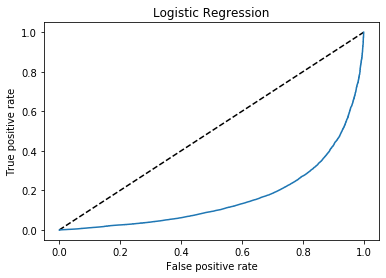

In [131]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Logistic Regression")
plt.show()

In [133]:
aur_score = roc_auc_score[y_test,lg.predict(x_test)]
print(aur_score)

TypeError: 'function' object is not subscriptable

### GausianNB

In [135]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train,)
gnb.score(x_train,y_train)

0.6916404964857186

In [136]:
predgnb = gnb.predict(x_test)
print('F1_score:',f1_score(predgnb,y_test))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

F1_score: 0.7901580900616579
[[ 7063  1570]
 [19973 40560]]
              precision    recall  f1-score   support

           0       0.26      0.82      0.40      8633
           1       0.96      0.67      0.79     60533

    accuracy                           0.69     69166
   macro avg       0.61      0.74      0.59     69166
weighted avg       0.88      0.69      0.74     69166



In [137]:
gnbscores=cross_val_score(lg,X=x_train,y=y_train,cv=5,scoring='f1')
print(gnbscores)
print(gnbscores.mean()*100,lgscores.std()*100)

[0.93589645 0.93522664 0.93405622 0.93437674 0.93470738]
93.48526847839243 0.06498137021767621


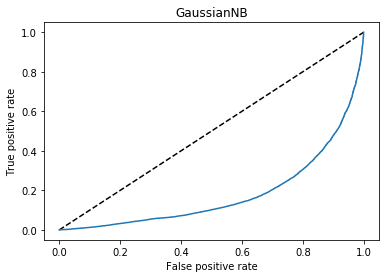

In [138]:
y_pred_prob = gnb.predict_proba(x_test)[:,0]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="GaussianNB")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("GaussianNB")
plt.show()


### DecisionTree

In [139]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy')
dct.fit(x_train,y_train)
dct.score(x_train,y_train)

0.9996653065293711

In [140]:
preddct = dct.predict(x_test)
preddct
print('f1_score',f1_score(preddct,y_test))
print(confusion_matrix(y_test,preddct))
print(classification_report(y_test,preddct))

f1_score 0.9226832298136646
[[ 4123  4510]
 [ 4826 55707]]
              precision    recall  f1-score   support

           0       0.46      0.48      0.47      8633
           1       0.93      0.92      0.92     60533

    accuracy                           0.87     69166
   macro avg       0.69      0.70      0.70     69166
weighted avg       0.87      0.87      0.87     69166



In [141]:
dctscores=cross_val_score(dct,X=x_train,y=y_train,cv=5,scoring='f1')
print(dctscores)
print(dctscores.mean()*100,dctscores.std()*100) 

[0.92398376 0.92294188 0.92263036 0.92333769 0.91935978]
92.2450697384808 0.16102385454228096


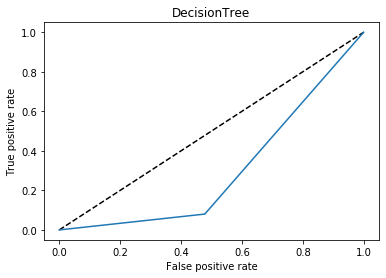

In [142]:
y_pred_prob = dct.predict_proba(x_test)[:,0]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="DecisionTree")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("DecisionTree")
plt.show()


### Knn

In [143]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=4,weights='uniform',algorithm='auto')
Knn.fit(x_train,y_train)
Knn.score(x_train,y_train)

0.9098107913720296

In [144]:
predknn = Knn.predict(x_test)
predknn
print('f1_score',f1_score(predknn,y_test))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

f1_score 0.9165129227956453
[[ 3978  4655]
 [ 5391 55142]]
              precision    recall  f1-score   support

           0       0.42      0.46      0.44      8633
           1       0.92      0.91      0.92     60533

    accuracy                           0.85     69166
   macro avg       0.67      0.69      0.68     69166
weighted avg       0.86      0.85      0.86     69166



In [145]:
knnscores=cross_val_score(Knn,X=x_train,y=y_train,cv=5,scoring='f1')
print(knnscores)
print(knnscores.mean()*100,knnscores.std()*100)

[0.92041904 0.91839738 0.91689677 0.91985878 0.91594986]
91.83043675382875 0.16983344837819828


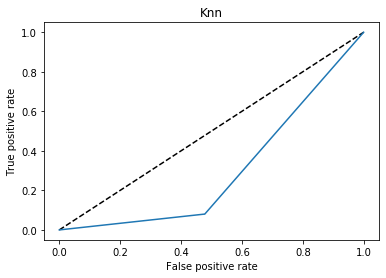

In [146]:
y_pred_prob = dct.predict_proba(x_test)[:,0]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Knn")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Knn")
plt.show()

### Random Forest

In [148]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500,max_features ='log2',max_depth = 8,criterion='entropy')

rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9054384128408355

In [149]:
predrf = rf.predict(x_test)
predrf

print('predicted',predrf)
print('actual',y_test)

print(f1_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

predicted [1 1 1 ... 1 1 1]
actual         label
41720       1
34773       1
155852      1
147428      0
189933      1
...       ...
81278       1
182994      1
512         1
88881       1
134159      1

[69166 rows x 1 columns]
0.9477564329765364
[[ 2368  6265]
 [  368 60165]]
              precision    recall  f1-score   support

           0       0.87      0.27      0.42      8633
           1       0.91      0.99      0.95     60533

    accuracy                           0.90     69166
   macro avg       0.89      0.63      0.68     69166
weighted avg       0.90      0.90      0.88     69166



In [151]:
rfscores=cross_val_score(rf,X=x_train,y=y_train,cv=5,scoring='f1')
print(rfscores)
print(rfscores.mean()*100,rfscores.std()*100)

[0.94709497 0.94874832 0.94865022 0.94863532 0.94752158]
94.81300853927522 0.06855305282115845


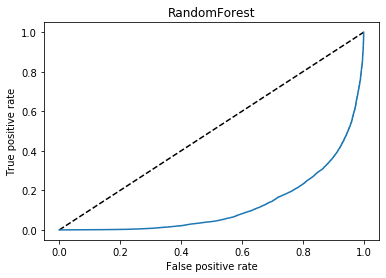

In [152]:
y_pred_prob = rf.predict_proba(x_test)[:,0]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="RandomForest")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("RandomForest")
plt.show()

In [ ]:
list1=[lg.score(x_train,y_train),f1_score(y_test,pred),lgscores.mean()*100]
list2=[gnb.score(x_train,y_train),f1_score(predgnb,y_test),gnbscores.mean()*100]
list3=[dct.score(x_train,y_train),f1_score(preddct,y_test),dctscores.mean()*100]
list4=[Knn.score(x_train,y_train),f1_score(predknn,y_test),knnscores.mean()*100]
list5=[rf.score(x_train,y_train),f1_score(y_test,predrf),rfscores.mean()*100]

In [153]:
list1=[lg.score(x_train,y_train),gnb.score(x_train,y_train),dct.score(x_train,y_train),Knn.score(x_train,y_train),rf.score(x_train,y_train)]
list2=[f1_score(y_test,pred),f1_score(predgnb,y_test),f1_score(preddct,y_test),f1_score(predknn,y_test),f1_score(y_test,predrf)]
list3=[lgscores.mean()*100,gnbscores.mean()*100,dctscores.mean()*100,knnscores.mean()*100,rfscores.mean()*100]


In [157]:
list4=['Lg','gnb','dct','Knn','rf']

In [162]:
model_performance=pd.DataFrame(list(zip(list4,list1,list2,list3)),columns=['Models','train_score','test_score','cross_val_score'])

In [163]:
model_performance

,Models,train_score,test_score,cross_val_score
0,Lg,0.879268,0.934235,93.485268
1,gnb,0.691640,0.790158,93.485268
2,dct,0.999665,0.922683,92.245070
3,Knn,0.909811,0.916513,91.830437
4,rf,0.905438,0.947756,94.813009


# Conclusion

From the above table it is observed that RandomForest is the best performing model.